#Image Classification Convolutional Neural Network

# **Downloading Data from Kaggle**


In [10]:
!pip install --upgrade --ignore-installed kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 6.1 MB/s 
     |████████████████████████████████| 155 kB 32.6 MB/s 
     |████████████████████████████████| 247 kB 67.3 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 78 kB 10.0 MB/s 
     |████████████████████████████████| 140 kB 43.8 MB/s 
     |████████████████████████████████| 78 kB 9.1 MB/s 
     |████████████████████████████████| 61 kB 122 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=7f3e8f95f2ddb566e4a66f0005bf2bd43739dd1cda4e3706ee1cb26e6f680d99
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependenc

In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muizzahkhan","key":"54bf8e6e9112d814244c3948f03aae43"}'}

In [12]:
!mkdir ~/.kaggle #created at root folder in colab

In [13]:
!cp kaggle.json ~/.kaggle

In [14]:
! chmod 600 ~/.kaggle/kaggle.json

In [15]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10803        316  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1785         52  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6750        149  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [16]:
!kaggle datasets download -d puneet6060/intel-image-classification

100% 346M/346M [00:09<00:00, 43.4MB/s]
100% 346M/346M [00:09<00:00, 39.4MB/s]


In [17]:
!unzip -q intel-image-classification.zip

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

#Importing Necessary libraries

In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import tensorflow as tf

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator


In [4]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import h5py

In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Data Preparation

In [15]:
# list directories
for root, dirs, files in os.walk('../content/'):
        print(dirs)

['.config', 'seg_pred', 'drive', 'seg_train', 'seg_test', 'sample_data']
['logs', 'configurations']
['2022.12.16']
[]
[]
['seg_pred']
[]
['MyDrive', '.file-revisions-by-id', '.shortcut-targets-by-id', '.Trash-0']
['Fiverr.zip (Unzipped Files)', 'School registration GIS day (File responses)', 'GIS Day OC Card Photographs  (File responses)', 'Colab Notebooks']
['Fiverr']
[]
['Students Details (Name, Class, Contact number, CNIC Form B Number) Upload an excel file with the required details (File responses)']
[]
['Upload Image  (File responses)']
[]
[]
[]
[]
['files', 'info']
[]
[]
['seg_train']
['sea', 'street', 'forest', 'mountain', 'buildings', 'glacier']
[]
[]
[]
[]
[]
[]
['seg_test']
['sea', 'street', 'forest', 'mountain', 'buildings', 'glacier']
[]
[]
[]
[]
[]
[]
[]


So the images are arranged like below:

 ![ img ](https://lh3.googleusercontent.com/6QieGOIe_BUdM4Q0c_12wRQJRUnbsC2LcOrKi5hrhAqcy-SL4b7NIk0cUBISYSLFbIbKVog=s900)

In [23]:
# define the important paths
train_dir = "/content/seg_train/seg_train"
test_dir = "/content/seg_test/seg_test"
pred_dir = '/content/seg_test/seg_pred'

In [28]:
# explore the image sizes
np.array(img).shape

(150, 150, 3)

* Some images include both building and street which might affect the model
* Images are 150x150

##Data Augmentation

In [20]:
# ImageDataGenerator from Tensorflow can be used for Data Augmentation. It will add more images based on rotation_range, width_shift_range, height_shift_range, shear_range, zoom_range, horizontal_flip, vertical_flip and brightness_range
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,
                                  rotation_range=20 ,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  brightness_range=[0.6,0.9],
                                  fill_mode='nearest')
test_datagen = ImageDataGenerator( rescale = 1.0/255)



In [27]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=128,
                                                         shuffle=False,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150)) # it is very important to include shuffle=False otherwise confusion metrics will not correct

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [20]:
# Print the classes

train_generator.class_indices


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

#Data Visualization

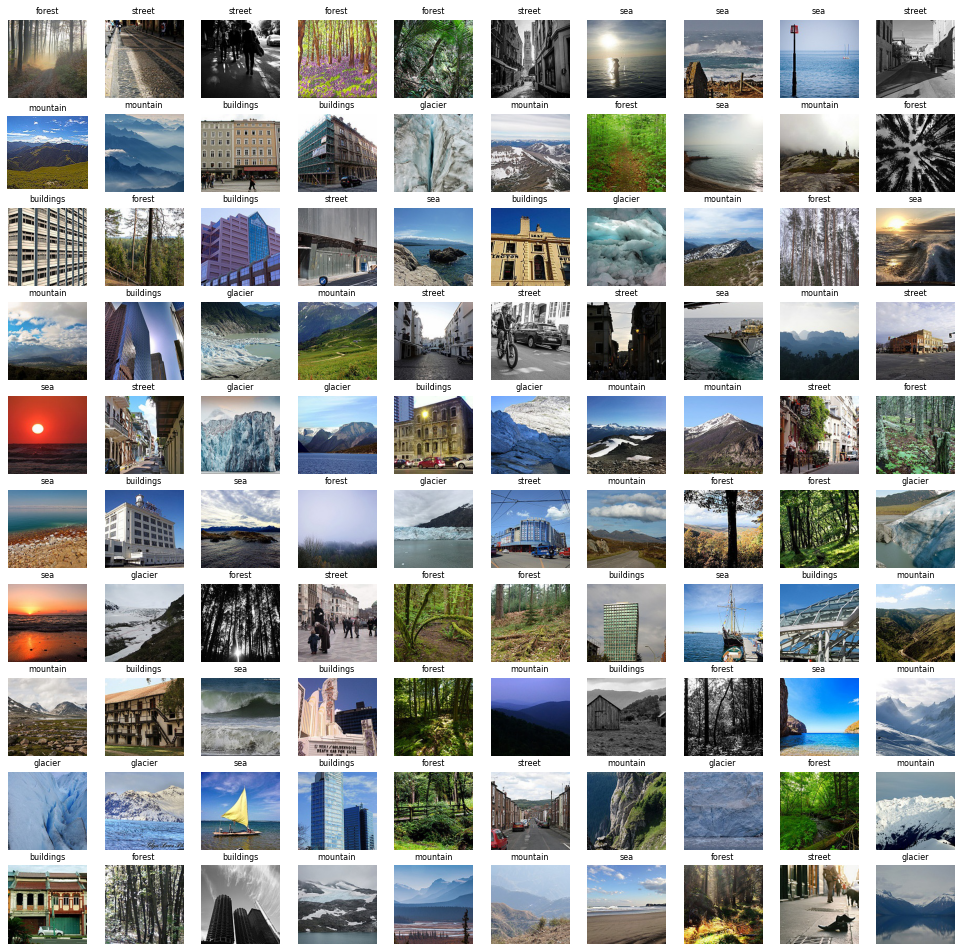

In [26]:
# visualize the training data
W = 10
H = 10
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel() # flaten the matrix into array
# Select a random number from 0 to n_training/ images will be selected randomly
for i in np.arange(0, W * H): 
    # Select a class randomly
    label = random.choice(os.listdir(train_dir))
    class_dir = os.path.join(train_dir,label)
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    #print(np.array(img).shape)
    axes[i].set_title(label, fontsize = 8) # the label
    axes[i].axis('off')



#Model Building

In [6]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2), 
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(), 
#     tf.keras.layers.Dense(512, activation='relu'), 
#     tf.keras.layers.Dense(128, activation='relu'), 
#     tf.keras.layers.Dense(6, activation='softmax')  
# ])
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #1st layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #2nd layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #3rd layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #4th layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='softmax')                                                       
])

#The Conv layer tries to capture the low level features 
#and as we move forward in the layers, the patterns get more complex; 
#hence there are larger combinations of patterns to capture. 
#That's why we increase the number of filters as we go deeper in the network to capture as many combinations as possible.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 16)      2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 144, 144, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 72, 72, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 70, 70, 32)        4640      
                                                        

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

#Fitting The Model

In [29]:
history = model.fit(train_generator, epochs = 20, validation_data = validation_generator, verbose = 1, steps_per_epoch = 110)

# steps_per_epoch  = total number of samples // batch_size = 14034/128

Epoch 1/20
110/110 [==============================] - 112s 915ms/step - loss: 1.5154 - accuracy: 0.3600 - val_loss: 1.1629 - val_accuracy: 0.5460
Epoch 2/20
110/110 [==============================] - 97s 884ms/step - loss: 1.1295 - accuracy: 0.5353 - val_loss: 1.1545 - val_accuracy: 0.5560
Epoch 3/20
110/110 [==============================] - 99s 903ms/step - loss: 1.0162 - accuracy: 0.5839 - val_loss: 1.0550 - val_accuracy: 0.5967
Epoch 4/20
110/110 [==============================] - 98s 888ms/step - loss: 0.9506 - accuracy: 0.6216 - val_loss: 0.9677 - val_accuracy: 0.6200
Epoch 5/20
110/110 [==============================] - 99s 897ms/step - loss: 0.8906 - accuracy: 0.6568 - val_loss: 0.8224 - val_accuracy: 0.6963
Epoch 6/20
110/110 [==============================] - 100s 908ms/step - loss: 0.8362 - accuracy: 0.6719 - val_loss: 0.7793 - val_accuracy: 0.7027
Epoch 7/20
110/110 [==============================] - 98s 892ms/step - loss: 0.7919 - accuracy: 0.7016 - val_loss: 0.7019 - val_

## Save the model

In [30]:
model.save('classify_CNN_trial.h5')

##Load The Model

In [26]:
# model = tf.keras.models.load_model('classify_CNN_trial.h5')

##Save weights

In [32]:
model.save_weights('/content/model_CNN_trial_wts.h5')

##Load The Weights

In [ ]:
# model.load_weights('model_CNN_wts.h5')

##Evaluate the Model Loss And Accuracy


In [33]:
score = model.evaluate(validation_generator, steps=len(validation_generator), verbose=1)
print('%.2f'%(score[1]*100))
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

24/24 [==============================] - 4s 172ms/step - loss: 0.5028 - accuracy: 0.8257
82.57
Test Loss =  0.5028132200241089
Test Accuracy =  0.8256666660308838


#Plot The Loss and Accuracy for Training And Validation Data

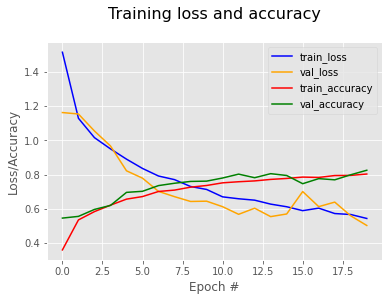

In [34]:
plt.style.use('ggplot')
plt.plot(history.history['loss'], color='blue', label='train_loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.plot(history.history['accuracy'], color='red', label='train_accuracy')
plt.plot(history.history['val_accuracy'], color='green', label='val_accuracy')
plt.grid(True)
plt.title("Training loss and accuracy\n", fontsize=16)
plt.xlabel("Epoch #", fontsize=12)
plt.ylabel("Loss/Accuracy", fontsize=12)
plt.legend()
plt.show();

#Generate Confusion Metrics and Classification Report

24/24 [==============================] - 4s 153ms/step - loss: 0.5028 - accuracy: 0.8257
Confusion Matrix
[[346   3   3   5   3  77]
 [  1 457   1   8   0   7]
 [  9   8 451  57  20   8]
 [  4   6  82 392  35   6]
 [ 18   6  46  27 400  13]
 [ 48  13   0   3   6 431]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.81      0.79      0.80       437
      forest       0.93      0.96      0.95       474
     glacier       0.77      0.82      0.79       553
    mountain       0.80      0.75      0.77       525
         sea       0.86      0.78      0.82       510
      street       0.80      0.86      0.83       501

    accuracy                           0.83      3000
   macro avg       0.83      0.83      0.83      3000
weighted avg       0.83      0.83      0.83      3000



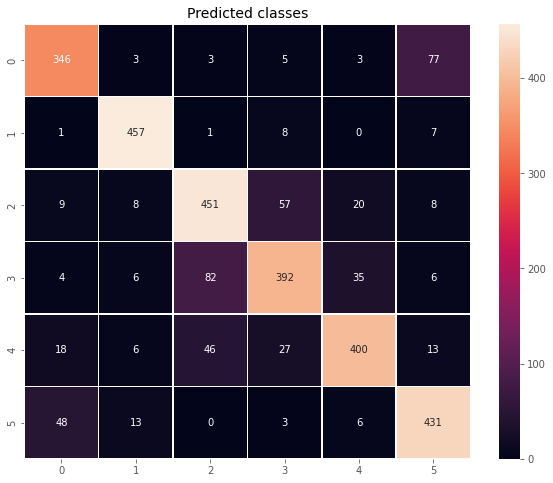

In [35]:
from sklearn.metrics import confusion_matrix, classification_report

#Confusion Matrix and Classification Report
Y_pred = model.predict(validation_generator)
model.evaluate(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['buildings','forest','glacier','mountain','sea','street']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
#Plot Confusion Metrics
sns.heatmap(confusion_matrix(validation_generator.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
plt.show()